In [1]:
import pm4py
import sys
sys.path.append('../../TaskExecutionTimeMining/')
from event_log_transformer import *
pandas.set_option('display.max_columns', 100)

In [2]:
file_path = '../../../data/BPI Challenge 2017.xes'
event_log = pm4py.read_xes(file_path)

parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

In [3]:
event_log

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202262,Deleted,User_1,W_Call after offers,Workflow,Workitem_1817549786,ate_abort,2017-01-06 06:33:02.212000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202263,Created,User_1,W_Call after offers,Workflow,Workitem_363876066,schedule,2017-01-06 06:33:02.221000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202264,statechange,User_28,A_Cancelled,Application,ApplState_1869071797,complete,2017-01-16 09:51:21.114000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202265,statechange,User_28,O_Cancelled,Offer,OfferState_420066181,complete,2017-01-16 09:51:21.139000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1580299144


In [4]:
pandas.set_option('display.max_rows', 100)
event_log.groupby(['concept:name', 'lifecycle:transition']).nunique()

,,Action,org:resource,EventOrigin,EventID,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
concept:name,lifecycle:transition,,,,,,,,,,,,,,,,,
A_Accepted,complete,1,113,1,31509,31509,14,2,31509,701,0,0,0,0,0,0,0,0
A_Cancelled,complete,1,108,1,10431,10431,14,2,10431,393,0,0,0,0,0,0,0,0
A_Complete,complete,1,113,1,31362,31362,14,2,31362,699,0,0,0,0,0,0,0,0
A_Concept,complete,1,114,1,31509,31509,14,2,31509,701,0,0,0,0,0,0,0,0
A_Create Application,complete,1,111,1,31509,31509,14,2,31509,701,0,0,0,0,0,0,0,0
A_Denied,complete,1,99,1,3753,3753,13,2,3752,238,0,0,0,0,0,0,0,0
A_Incomplete,complete,1,101,1,23055,23055,13,2,15003,515,0,0,0,0,0,0,0,0
A_Pending,complete,1,40,1,17228,17227,13,2,17228,520,0,0,0,0,0,0,0,0
A_Submitted,complete,1,1,1,20423,20423,14,1,20423,536,0,0,0,0,0,0,0,0


In [5]:
#event_log[(event_log['concept:name'] == 'W_Complete application')][:99999].to_csv('test.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')

In [6]:
waiting_time_event_log = TransformEventLog.start_end_event_log_mult(event_log,
                                                                    start_name_1='suspend',
                                                                    complete_name_1 = 'resume',
                                                                    complete_name_2 = 'ate_abort',
                                                                    complete_name_3 = 'pi_abort',
                                                                   start_name_gen='_suspend',
                                                                   complete_name_gen='_resume')

/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_end_event_log.loc[:, 'duration'] = start_end_event_log[timestamp_name + complete_name_gen] - start_end_event_log[timestamp_name + start_name_gen]
/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  start_en

In [7]:
waiting_time_event_log.groupby(['lifecycle:transition_suspend', 'lifecycle:transition_resume']).count()

Action_suspend  \
lifecycle:transition_suspend lifecycle:transition_resume                   
suspend                      ate_abort                             85846   
                             resume                               129432   

                                                          org:resource_suspend  \
lifecycle:transition_suspend lifecycle:transition_resume                         
suspend                      ate_abort                                   85846   
                             resume                                     129432   

                                                          concept:name  \
lifecycle:transition_suspend lifecycle:transition_resume                 
suspend                      ate_abort                           85846   
                             resume                             129432   

                                                          EventOrigin_suspend  \
lifecycle:transition_suspend lifecycle:transition_resume                        
suspend                      ate_abort                                  85846   
                             resume                                    129432   

                                                          EventID_suspend  \
lifecycle:transition_suspend lifecycle:transition_resume                    
suspend                      ate_abort                              85846   
                             resume                                129432   

                                                          time:timestamp_suspend  \
lifecycle:transition_suspend lifecycle:transition_resume                           
suspend                      ate_abort                                     85846   
                             resume                                       129432   

                                                          case:LoanGoal_suspend  \
lifecycle:transition_suspend lifecycle:transition_resume                          
suspend                      ate_abort                                    85846   
                             resume                                      129432   

                                                          case:ApplicationType_suspend  \
lifecycle:transition_suspend lifecycle:transition_resume                                 
suspend                      ate_abort                                           85846   
                             resume                                             129432   

                                                          case:concept:name  \
lifecycle:transition_suspend lifecycle:transition_resume                      
suspend                      ate_abort                                85846   
                             resume                                  129432   

                                                          case:RequestedAmount_suspend  \
lifecycle:transition_suspend lifecycle:transition_resume                                 
suspend                      ate_abort                                           85846   
                             resume                                             129432   

                                                          FirstWithdrawalAmount_suspend  \
lifecycle:transition_suspend lifecycle:transition_resume                                  
suspend                      ate_abort                                                0   
                             resume                                                   0   

                                                          NumberOfTerms_suspend  \
lifecycle:transition_suspend lifecycle:transition_resume                          
suspend                      ate_abort                                        0   
                             resume                                           0   

                                                          Accepted_suspend  \
lifecycl

In [8]:
(waiting_time_event_log['duration_seconds']/3600).describe()

count    215278.000000
mean         70.577830
std         137.909589
min           0.000000
25%           1.422222
50%          19.285556
75%          91.509792
max        3295.248889
Name: duration_seconds, dtype: float64

<Axes: xlabel='Duration (hours)'>

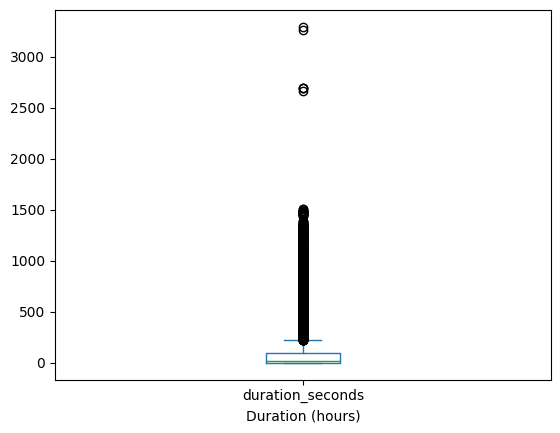

In [9]:
(waiting_time_event_log['duration_seconds']/3600).plot.box(xlabel='Duration (hours)')

In [10]:
waiting_time_event_log[waiting_time_event_log['duration_seconds'] > 1000*3600]

,Action_suspend,org:resource_suspend,concept:name,EventOrigin_suspend,EventID_suspend,lifecycle:transition_suspend,time:timestamp_suspend,case:LoanGoal_suspend,case:ApplicationType_suspend,case:concept:name,case:RequestedAmount_suspend,FirstWithdrawalAmount_suspend,NumberOfTerms_suspend,Accepted_suspend,MonthlyCost_suspend,Selected_suspend,CreditScore_suspend,OfferedAmount_suspend,OfferID_suspend,Action_resume,org:resource_resume,EventOrigin_resume,EventID_resume,lifecycle:transition_resume,time:timestamp_resume,case:LoanGoal_resume,case:ApplicationType_resume,case:RequestedAmount_resume,FirstWithdrawalAmount_resume,NumberOfTerms_resume,Accepted_resume,MonthlyCost_resume,Selected_resume,CreditScore_resume,OfferedAmount_resume,OfferID_resume,duration,duration_seconds
60552,Released,User_2,W_Call after offers,Workflow,Workitem_1003956411,suspend,2016-01-11 08:22:49.827000+00:00,Car,New credit,Application_1854801140,8750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_544883341,ate_abort,2016-02-29 07:00:15.373000+00:00,Car,New credit,8750.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48 days 22:37:25.546000,4228645
4010116,Released,User_85,W_Call incomplete files,Workflow,Workitem_1012232622,suspend,2016-07-19 17:35:44.601000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_2,Workflow,Workitem_2108399036,resume,2016-09-19 11:55:58.611000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61 days 18:20:14.010000,5336414
48663,Released,User_2,W_Call after offers,Workflow,Workitem_1012694081,suspend,2016-01-11 07:59:50.104000+00:00,Existing loan takeover,New credit,Application_1044911465,19500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_1450968826,ate_abort,2016-02-29 07:00:56.077000+00:00,Existing loan takeover,New credit,19500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48 days 23:01:05.973000,4230065
5873172,Released,User_23,W_Call after offers,Workflow,Workitem_1018140385,suspend,2016-09-10 09:13:28.331000+00:00,"Other, see explanation",New credit,Application_885314623,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_671230775,ate_abort,2016-10-22 06:00:29.603000+00:00,"Other, see explanation",New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41 days 20:47:01.272000,3617221
49107,Released,User_15,W_Call after offers,Workflow,Workitem_1018154126,suspend,2016-01-08 09:08:04.169000+00:00,Home improvement,New credit,Application_862160604,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_233191443,ate_abort,2016-02-29 07:00:54.347000+00:00,Home improvement,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51 days 21:52:50.178000,4485170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753283,Released,User_3,W_Call after offers,Workflow,Workitem_985592907,suspend,2016-05-10 07:29:45.429000+00:00,Existing loan takeover,New credit,Application_836064793,45000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_539194123,ate_abort,2016-06-27 21:43:11.396000+00:00,Existing loan takeover,New credit,45000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48 days 14:13:25.967000,4198405
91154,Released,User_27,W_Call after offers,Workflow,Workitem_986886559,suspend,2016-01-11 10:49:54.271000+00:00,Car,New credit,Application_111956933,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_812545881,ate_abort,2016-03-03 07:01:30.026000+00:00,Car,New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51 days 20:11:35.755000,4479095
5940947,Released,User_58,W_Call after offers,Workflow,Workitem_987090735,suspend,2016-09-13 09:48:04.596000+00:00,Home improvement,New credit,Application_155830982,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_1070616468,ate_abort,2016-10-25 06:02:42.387000+00:00,Home improvement,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41 days 20:14:37.791

In [11]:
waiting_time_event_log[waiting_time_event_log['case:concept:name'] == 'Application_242134213'].sort_values('time:timestamp_suspend')

,Action_suspend,org:resource_suspend,concept:name,EventOrigin_suspend,EventID_suspend,lifecycle:transition_suspend,time:timestamp_suspend,case:LoanGoal_suspend,case:ApplicationType_suspend,case:concept:name,case:RequestedAmount_suspend,FirstWithdrawalAmount_suspend,NumberOfTerms_suspend,Accepted_suspend,MonthlyCost_suspend,Selected_suspend,CreditScore_suspend,OfferedAmount_suspend,OfferID_suspend,Action_resume,org:resource_resume,EventOrigin_resume,EventID_resume,lifecycle:transition_resume,time:timestamp_resume,case:LoanGoal_resume,case:ApplicationType_resume,case:RequestedAmount_resume,FirstWithdrawalAmount_resume,NumberOfTerms_resume,Accepted_resume,MonthlyCost_resume,Selected_resume,CreditScore_resume,OfferedAmount_resume,OfferID_resume,duration,duration_seconds
4009878,Released,User_26,W_Call after offers,Workflow,Workitem_1706478292,suspend,2016-06-21 18:08:53.149000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_8,Workflow,Workitem_1385618386,resume,2016-06-27 08:07:01.221000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 days 13:58:08.072000,482288
4009892,Released,User_8,W_Call after offers,Workflow,Workitem_962848913,suspend,2016-06-27 08:07:42.738000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_27,Workflow,Workitem_1860362994,ate_abort,2016-07-11 07:40:33.297000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13 days 23:32:50.559000,1207970
4009920,Released,User_27,W_Validate application,Workflow,Workitem_1134881291,suspend,2016-07-11 07:59:37.642000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_87,Workflow,Workitem_406107219,resume,2016-07-14 05:27:47.053000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 days 21:28:09.411000,250089
4009938,Released,User_87,W_Validate application,Workflow,Workitem_81295823,suspend,2016-07-14 05:27:53.899000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_87,Workflow,Workitem_348381863,resume,2016-07-14 05:28:13.105000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:00:19.206000,19
4009956,Released,User_87,W_Validate application,Workflow,Workitem_2141538056,suspend,2016-07-14 05:28:18.360000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_75,Workflow,Workitem_1872489136,ate_abort,2016-07-14 09:56:06.401000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 04:27:48.041000,16068
4010003,Released,User_75,W_Call incomplete files,Workflow,Workitem_1426848994,suspend,2016-07-14 10:07:26.499000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_16,Workflow,Workitem_806272186,resume,2016-07-14 12:46:42.908000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 02:39:16.409000,9556
4010039,Released,User_16,W_Call incomplete files,Workflow,Workitem_998221424,suspend,2016-07-14 12:47:26.563000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_28,Workflow,Workitem_1833445296,resume,2016-07-14 17:06:21.292000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 04:18:54.729000,15534
4010080,Released,User_28,W_Call incomplete files,Workflow,Workitem_1850600532,suspend,2016-07-14 17:17:08.208000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_85,Workflow,Workitem_667471685,resume,2016-07-19 17:33:37.578000+00:00,Car,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 days 00:16:29.370000,432989
4010116,Released,User_85,W_Call incomplete files,Workflow,Workitem_1012232622,suspend,2016-07-19 17:35:44.601000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_2,Workflow,Workitem_2108399036,resume,2016-09-19 11:55:58.611000+00:00,Car,New credit,15000.0,NaN,Na

In [12]:
event_log[event_log['case:concept:name'] == 'Application_242134213'].sort_values('time:timestamp')

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
520339,Created,User_26,A_Create Application,Application,Application_242134213,complete,2016-06-21 17:50:10.675000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520340,Created,User_26,W_Complete application,Workflow,Workitem_1091179764,schedule,2016-06-21 17:50:10.687000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520341,Obtained,User_26,W_Complete application,Workflow,Workitem_935505721,start,2016-06-21 17:50:10.690000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520342,statechange,User_26,A_Concept,Application,ApplState_1185539899,complete,2016-06-21 17:50:10.694000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520343,statechange,User_26,A_Accepted,Application,ApplState_1683496203,complete,2016-06-21 17:59:32.602000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520344,Created,User_26,O_Create Offer,Offer,Offer_180897942,complete,2016-06-21 18:03:09.887000+00:00,Car,New credit,Application_242134213,15000.0,15000.0,90.0,True,195.38,True,0.0,15000.0,NaN
520345,statechange,User_26,O_Created,Offer,OfferState_1393237543,complete,2016-06-21 18:03:11.242000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_180897942
520346,statechange,User_26,O_Sent (mail and online),Offer,OfferState_1703709059,complete,2016-06-21 18:04:43.314000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_180897942
520347,Deleted,User_26,W_Complete application,Workflow,Workitem_621254329,complete,2016-06-21 18:04:43.388000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
520348,Created,User_26,W_Call after offers,Workflow,Workitem_940030864,schedule,2016-06-21 18:04:43.433000+00:00,Car,New credit,Application_242134213,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
waiting_time_event_log

,Action_suspend,org:resource_suspend,concept:name,EventOrigin_suspend,EventID_suspend,lifecycle:transition_suspend,time:timestamp_suspend,case:LoanGoal_suspend,case:ApplicationType_suspend,case:concept:name,case:RequestedAmount_suspend,FirstWithdrawalAmount_suspend,NumberOfTerms_suspend,Accepted_suspend,MonthlyCost_suspend,Selected_suspend,CreditScore_suspend,OfferedAmount_suspend,OfferID_suspend,Action_resume,org:resource_resume,EventOrigin_resume,EventID_resume,lifecycle:transition_resume,time:timestamp_resume,case:LoanGoal_resume,case:ApplicationType_resume,case:RequestedAmount_resume,FirstWithdrawalAmount_resume,NumberOfTerms_resume,Accepted_resume,MonthlyCost_resume,Selected_resume,CreditScore_resume,OfferedAmount_resume,OfferID_resume,duration,duration_seconds
5344983,Released,User_63,W_Call after offers,Workflow,Workitem_1000010198,suspend,2016-08-20 12:19:22.434000+00:00,Home improvement,New credit,Application_1930272371,22500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_83701135,ate_abort,2016-09-16 06:00:42.189000+00:00,Home improvement,New credit,22500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 days 17:41:19.755000,2310079
7210692,Released,User_30,W_Call incomplete files,Workflow,Workitem_1000014801,suspend,2016-11-30 16:55:49.483000+00:00,Not speficied,New credit,Application_655052891,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_58,Workflow,Workitem_452812339,resume,2016-11-30 19:28:01.070000+00:00,Not speficied,New credit,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 02:32:11.587000,9131
1928411,Released,User_46,W_Call after offers,Workflow,Workitem_1000025049,suspend,2016-03-29 15:38:28.763000+00:00,Car,New credit,Application_1854738901,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_119,Workflow,Workitem_1718285890,ate_abort,2016-04-01 09:28:10.244000+00:00,Car,New credit,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 days 17:49:41.481000,236981
1271378,Released,User_5,W_Call incomplete files,Workflow,Workitem_1000028973,suspend,2016-03-09 11:02:30.451000+00:00,Existing loan takeover,New credit,Application_712301423,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_117,Workflow,Workitem_738176033,ate_abort,2016-03-22 08:16:03.845000+00:00,Existing loan takeover,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12 days 21:13:33.394000,1113213
7195882,Released,User_67,W_Call incomplete files,Workflow,Workitem_1000030699,suspend,2016-12-01 16:08:11.375000+00:00,Home improvement,New credit,Application_206930078,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_67,Workflow,Workitem_994725529,resume,2016-12-05 13:26:22.360000+00:00,Home improvement,New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days 21:18:10.985000,335890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798198,Released,User_10,W_Complete application,Workflow,Workitem_999975609,suspend,2016-09-05 16:26:51.673000+00:00,Car,New credit,Application_1386592498,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_56,Workflow,Workitem_1805046806,resume,2016-09-05 16:52:08.795000+00:00,Car,New credit,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:25:17.122000,1517
188404,Released,User_29,W_Validate application,Workflow,Workitem_999981856,suspend,2016-01-18 14:37:21.843000+00:00,Existing loan takeover,New credit,Application_947906225,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_99,Workflow,Workitem_1808211227,resume,2016-01-18 14:45:15.599000+00:00,Existing loan takeover,New credit,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:07:53.756000,473
6453413,Released,User_19,W_Call after offers,Workflow,Workitem_999988201,suspend,2016-10-04 18:43:06.137000+00:00,Home improvement,New credit,Application_1551324804,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_126,Workflow,Workitem_1692647692,ate_abort,2016-10-07 09:26:08.738000+00:00,Home improvement,New credit,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 days

In [14]:
# Seconds in day
waiting_time_event_log = TransformEventLog.seconds_in_day(waiting_time_event_log, 'time:timestamp_suspend')

In [15]:
waiting_time_event_log

,Action_suspend,org:resource_suspend,concept:name,EventOrigin_suspend,EventID_suspend,lifecycle:transition_suspend,time:timestamp_suspend,case:LoanGoal_suspend,case:ApplicationType_suspend,case:concept:name,case:RequestedAmount_suspend,FirstWithdrawalAmount_suspend,NumberOfTerms_suspend,Accepted_suspend,MonthlyCost_suspend,Selected_suspend,CreditScore_suspend,OfferedAmount_suspend,OfferID_suspend,Action_resume,org:resource_resume,EventOrigin_resume,EventID_resume,lifecycle:transition_resume,time:timestamp_resume,case:LoanGoal_resume,case:ApplicationType_resume,case:RequestedAmount_resume,FirstWithdrawalAmount_resume,NumberOfTerms_resume,Accepted_resume,MonthlyCost_resume,Selected_resume,CreditScore_resume,OfferedAmount_resume,OfferID_resume,duration,duration_seconds,seconds_in_day
5344983,Released,User_63,W_Call after offers,Workflow,Workitem_1000010198,suspend,2016-08-20 12:19:22.434000+00:00,Home improvement,New credit,Application_1930272371,22500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_1,Workflow,Workitem_83701135,ate_abort,2016-09-16 06:00:42.189000+00:00,Home improvement,New credit,22500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26 days 17:41:19.755000,2310079,44362
7210692,Released,User_30,W_Call incomplete files,Workflow,Workitem_1000014801,suspend,2016-11-30 16:55:49.483000+00:00,Not speficied,New credit,Application_655052891,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_58,Workflow,Workitem_452812339,resume,2016-11-30 19:28:01.070000+00:00,Not speficied,New credit,7000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 02:32:11.587000,9131,60949
1928411,Released,User_46,W_Call after offers,Workflow,Workitem_1000025049,suspend,2016-03-29 15:38:28.763000+00:00,Car,New credit,Application_1854738901,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_119,Workflow,Workitem_1718285890,ate_abort,2016-04-01 09:28:10.244000+00:00,Car,New credit,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 days 17:49:41.481000,236981,56308
1271378,Released,User_5,W_Call incomplete files,Workflow,Workitem_1000028973,suspend,2016-03-09 11:02:30.451000+00:00,Existing loan takeover,New credit,Application_712301423,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_117,Workflow,Workitem_738176033,ate_abort,2016-03-22 08:16:03.845000+00:00,Existing loan takeover,New credit,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12 days 21:13:33.394000,1113213,39750
7195882,Released,User_67,W_Call incomplete files,Workflow,Workitem_1000030699,suspend,2016-12-01 16:08:11.375000+00:00,Home improvement,New credit,Application_206930078,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_67,Workflow,Workitem_994725529,resume,2016-12-05 13:26:22.360000+00:00,Home improvement,New credit,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 days 21:18:10.985000,335890,58091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5798198,Released,User_10,W_Complete application,Workflow,Workitem_999975609,suspend,2016-09-05 16:26:51.673000+00:00,Car,New credit,Application_1386592498,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_56,Workflow,Workitem_1805046806,resume,2016-09-05 16:52:08.795000+00:00,Car,New credit,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:25:17.122000,1517,59211
188404,Released,User_29,W_Validate application,Workflow,Workitem_999981856,suspend,2016-01-18 14:37:21.843000+00:00,Existing loan takeover,New credit,Application_947906225,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Obtained,User_99,Workflow,Workitem_1808211227,resume,2016-01-18 14:45:15.599000+00:00,Existing loan takeover,New credit,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 00:07:53.756000,473,52641
6453413,Released,User_19,W_Call after offers,Workflow,Workitem_999988201,suspend,2016-10-04 18:43:06.137000+00:00,Home improvement,New credit,Application_1551324804,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Deleted,User_126,Workflow,Workitem_1692647692,ate_abort,2016-10-07 09:26:08.738000+00:00,Home improvem

In [16]:
# Resource counts

resource_count_event_log = TransformEventLog.value_count_per_case(waiting_time_event_log, 'org:resource_suspend',
                                                                  timestamp_name = 'time:timestamp_suspend',
                                                                 lifecycle_col_name = 'lifecycle:transition_suspend' )

/home/michel/Documents/TaskExecutionTimeMining/src/notebooks/BPIC_2017/../../TaskExecutionTimeMining/event_log_transformer.py:135: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  value_count_event_log = value_count_event_log.fillna(0)


In [17]:
resource_count_event_log

,Action_suspend,org:resource_suspend,concept:name,EventOrigin_suspend,EventID_suspend,lifecycle:transition_suspend,time:timestamp_suspend,case:LoanGoal_suspend,case:ApplicationType_suspend,case:concept:name,case:RequestedAmount_suspend,FirstWithdrawalAmount_suspend,NumberOfTerms_suspend,Accepted_suspend,MonthlyCost_suspend,Selected_suspend,CreditScore_suspend,OfferedAmount_suspend,OfferID_suspend,Action_resume,org:resource_resume,EventOrigin_resume,EventID_resume,lifecycle:transition_resume,time:timestamp_resume,case:LoanGoal_resume,case:ApplicationType_resume,case:RequestedAmount_resume,FirstWithdrawalAmount_resume,NumberOfTerms_resume,Accepted_resume,MonthlyCost_resume,Selected_resume,CreditScore_resume,OfferedAmount_resume,OfferID_resume,duration,duration_seconds,seconds_in_day,User_1,User_10,User_100,User_101,User_102,User_103,User_104,User_105,User_106,User_107,User_108,...,User_54,User_55,User_56,User_57,User_58,User_59,User_6,User_60,User_61,User_62,User_63,User_64,User_65,User_66,User_67,User_68,User_69,User_7,User_70,User_71,User_72,User_73,User_74,User_75,User_76,User_77,User_78,User_79,User_8,User_80,User_81,User_82,User_83,User_84,User_85,User_86,User_87,User_88,User_89,User_9,User_90,User_91,User_92,User_93,User_94,User_95,User_96,User_97,User_98,User_99
0,Released,User_63,W_Call after offers,Workflow,Workitem_1000010198,suspend,2016-08-20 12:19:22.434000+00:00,Home improvement,New credit,Application_1930272371,22500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_1,Workflow,Workitem_83701135,ate_abort,2016-09-16 06:00:42.189000+00:00,Home improvement,New credit,22500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,26 days 17:41:19.755000,2310079,44362,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Released,User_30,W_Call incomplete files,Workflow,Workitem_1000014801,suspend,2016-11-30 16:55:49.483000+00:00,Not speficied,New credit,Application_655052891,7000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_58,Workflow,Workitem_452812339,resume,2016-11-30 19:28:01.070000+00:00,Not speficied,New credit,7000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 02:32:11.587000,9131,60949,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Released,User_46,W_Call after offers,Workflow,Workitem_1000025049,suspend,2016-03-29 15:38:28.763000+00:00,Car,New credit,Application_1854738901,25000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_119,Workflow,Workitem_1718285890,ate_abort,2016-04-01 09:28:10.244000+00:00,Car,New credit,25000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,2 days 17:49:41.481000,236981,56308,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Released,User_5,W_Call incomplete files,Workflow,Workitem_1000028973,suspend,2016-03-09 11:02:30.451000+00:00,Existing loan takeover,New credit,Application_712301423,20000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_117,Workflow,Workitem_738176033,ate_abort,2016-03-22 08:16:03.845000+00:00,Existing loan takeover,New credit,20000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,12 days 21:13:33.394000,1113213,39750,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Released,User_67,W_Call incomplete files,Workflow,Workitem_1000030699,suspend,2016-12-01 16:08:11.375000+00:00,Home improvement,New credit,Application_206930078,5000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_67,Workflow,Workitem_994725529,resume,2016-12-05 13:26:22.360000+00:00,Home improvement,New credit,5000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,3 days 21:18:10.985000,335890,58091,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [18]:
activity_count_event_log = TransformEventLog.value_count_per_case(resource_count_event_log, 'concept:name',
                                                                  timestamp_name = 'time:timestamp_suspend',
                                                                 lifecycle_col_name = 'lifecycle:transition_suspend' )

In [19]:
activity_count_event_log

,Action_suspend,org:resource_suspend,concept:name,EventOrigin_suspend,EventID_suspend,lifecycle:transition_suspend,time:timestamp_suspend,case:LoanGoal_suspend,case:ApplicationType_suspend,case:concept:name,case:RequestedAmount_suspend,FirstWithdrawalAmount_suspend,NumberOfTerms_suspend,Accepted_suspend,MonthlyCost_suspend,Selected_suspend,CreditScore_suspend,OfferedAmount_suspend,OfferID_suspend,Action_resume,org:resource_resume,EventOrigin_resume,EventID_resume,lifecycle:transition_resume,time:timestamp_resume,case:LoanGoal_resume,case:ApplicationType_resume,case:RequestedAmount_resume,FirstWithdrawalAmount_resume,NumberOfTerms_resume,Accepted_resume,MonthlyCost_resume,Selected_resume,CreditScore_resume,OfferedAmount_resume,OfferID_resume,duration,duration_seconds,seconds_in_day,User_1,User_10,User_100,User_101,User_102,User_103,User_104,User_105,User_106,User_107,User_108,...,User_61,User_62,User_63,User_64,User_65,User_66,User_67,User_68,User_69,User_7,User_70,User_71,User_72,User_73,User_74,User_75,User_76,User_77,User_78,User_79,User_8,User_80,User_81,User_82,User_83,User_84,User_85,User_86,User_87,User_88,User_89,User_9,User_90,User_91,User_92,User_93,User_94,User_95,User_96,User_97,User_98,User_99,W_Assess potential fraud,W_Call after offers,W_Call incomplete files,W_Complete application,W_Handle leads,W_Personal Loan collection,W_Shortened completion,W_Validate application
0,Released,User_63,W_Call after offers,Workflow,Workitem_1000010198,suspend,2016-08-20 12:19:22.434000+00:00,Home improvement,New credit,Application_1930272371,22500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_1,Workflow,Workitem_83701135,ate_abort,2016-09-16 06:00:42.189000+00:00,Home improvement,New credit,22500.0,0.0,0.0,0,0.0,0,0.0,0.0,0,26 days 17:41:19.755000,2310079,44362,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
1,Released,User_30,W_Call incomplete files,Workflow,Workitem_1000014801,suspend,2016-11-30 16:55:49.483000+00:00,Not speficied,New credit,Application_655052891,7000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_58,Workflow,Workitem_452812339,resume,2016-11-30 19:28:01.070000+00:00,Not speficied,New credit,7000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0 days 02:32:11.587000,9131,60949,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,8,2,0,0,0,1
2,Released,User_46,W_Call after offers,Workflow,Workitem_1000025049,suspend,2016-03-29 15:38:28.763000+00:00,Car,New credit,Application_1854738901,25000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_119,Workflow,Workitem_1718285890,ate_abort,2016-04-01 09:28:10.244000+00:00,Car,New credit,25000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,2 days 17:49:41.481000,236981,56308,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Released,User_5,W_Call incomplete files,Workflow,Workitem_1000028973,suspend,2016-03-09 11:02:30.451000+00:00,Existing loan takeover,New credit,Application_712301423,20000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Deleted,User_117,Workflow,Workitem_738176033,ate_abort,2016-03-22 08:16:03.845000+00:00,Existing loan takeover,New credit,20000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,12 days 21:13:33.394000,1113213,39750,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,2
4,Released,User_67,W_Call incomplete files,Workflow,Workitem_1000030699,suspend,2016-12-01 16:08:11.375000+00:00,Home improvement,New credit,Application_206930078,5000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,Obtained,User_67,Workflow,Workitem_994725529,resume,2016-12-05 13:26:22.360000+00:00,Home improvement,New credit,5000.0,0.0,0.0,0,0.0,0,0.0,0.0,0,3 days 21:18:10.985000,335890,58091,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [20]:
activity_count_event_log.to_csv('../transformed_event_logs/BPIC_2017_waiting_time-suspend_resume.csv', index=False, date_format='%Y-%m-%d %H:%M:%S.%f')
activity_count_event_log.to_pickle('../transformed_event_logs/BPIC_2017_waiting_time-suspend_resume.pickle')